In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("housing.csv")
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [10]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [12]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [14]:
df.shape

(489, 4)

In [16]:
df.size

1956

In [18]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [20]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [24]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


C:\Users\lalit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


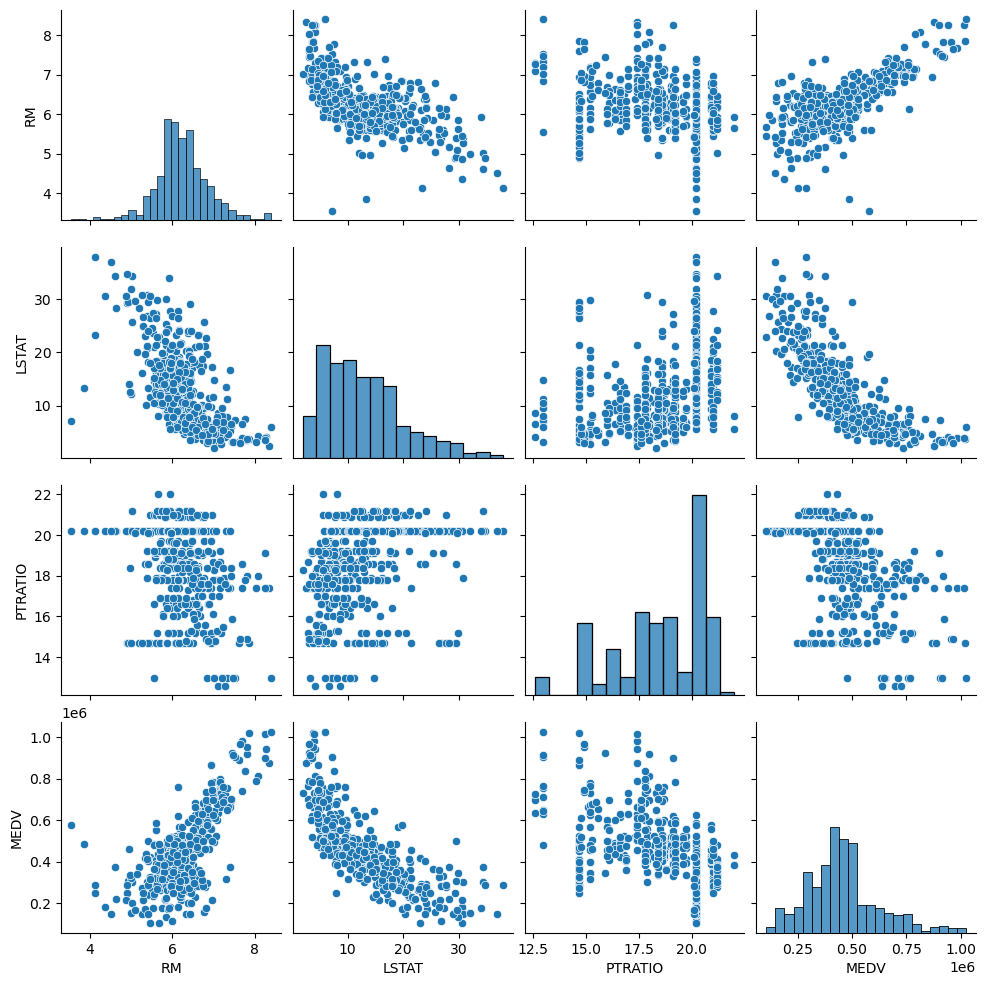

In [28]:
sns.pairplot(df)

Text(0, 0.5, 'MEDV')

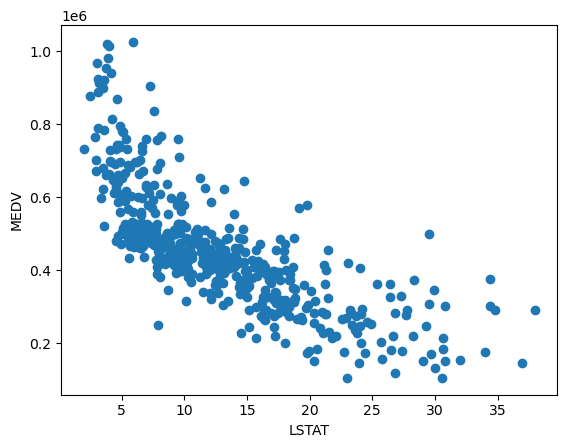

In [36]:
plt.scatter(df["LSTAT"], df["MEDV"])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

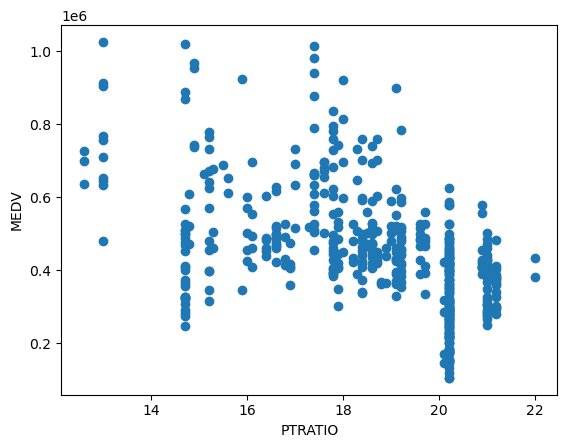

In [38]:
plt.scatter(df["PTRATIO"], df["MEDV"])
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")

<Axes: xlabel='MEDV', ylabel='PTRATIO'>

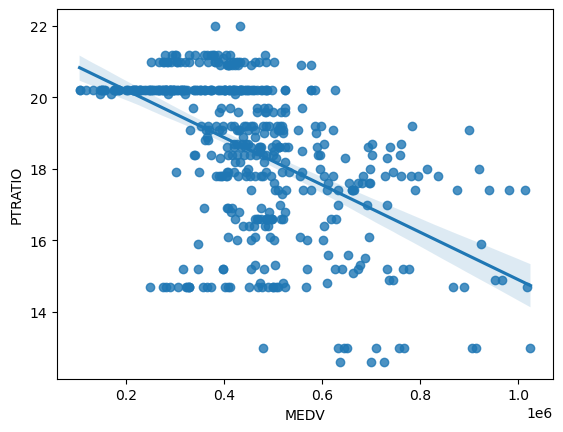

In [40]:
sns.regplot(x="MEDV", y = "PTRATIO", data = df)

<Axes: xlabel='RM', ylabel='PTRATIO'>

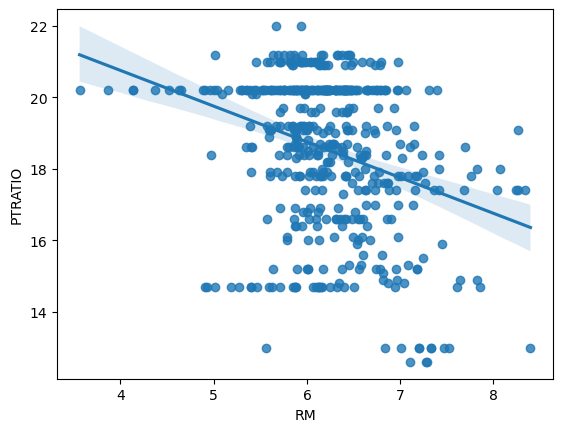

In [42]:
sns.regplot(x="RM", y="PTRATIO", data = df)

In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [52]:
X.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [194]:
print(X.shape)
# X = X.reshape(1, -1)  # Reshapes to (1, 1956) if you have 1 sample and 1956 features
# Convert DataFrame to a NumPy array
array_X = X.values

# Reshape the array (e.g., into 4 rows and 2 columns)
reshaped_X = array_X.reshape(1, -1)
print(reshaped_X)

(489, 3)
[[ 6.575  4.98  15.3   ...  6.03   7.88  21.   ]]


In [251]:
reshaped_X

array([[ 6.575,  4.98 , 15.3  , ...,  6.03 ,  7.88 , 21.   ]])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [255]:
X_train = scaler.fit_transform(X_train)

Model Training

In [203]:
from sklearn.linear_model import LinearRegression

In [205]:
regression = LinearRegression()

In [259]:
regression.fit(X_train, y_train)

LinearRegression()

In [209]:
regression.coef_

array([ 61624.23472682, -74655.853877  , -41795.7579288 ])

In [211]:
regression.intercept_

464032.4561403509

In [213]:
reg_predict = regression.predict(X_test)

C:\Users\lalit\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [215]:
reg_predict

array([-1368567.26982021,  -633661.14416948, -1293780.86115356,
       -1831929.48884913, -1772458.29789126,  -879872.99195935,
       -1748841.50499024,   -82220.81090823, -1122564.12644158,
        -372901.0739458 , -1077886.26037423, -1284427.55549834,
       -1741608.22191927, -1770598.65284198, -1547257.1396348 ,
        -444690.71990399, -1222371.00048186, -1352606.59302596,
       -1550656.63746146, -1192525.05450844,  -854759.22315278,
        -882482.59720065, -1442759.27404036,  -196492.19039877,
        -824240.21818613,  -705891.03522226,  -901466.76139252,
         -71674.82314232,   -71997.03871768, -2327927.4721534 ,
        -564235.34812553, -2023488.26746503,  -338110.68343105,
        -415068.43750811, -1432293.61682972,  -516507.88845614,
        -142049.44914887,  -791646.21885169,  -162904.80153899,
        -157097.08510875, -1106499.81042023,  -780241.81739551,
       -1318397.4402959 ,  -977368.36207537,  -958426.526902  ,
        -325329.64533241,  -950183.56751

In [217]:
residuals = y_test - reg_predict


In [219]:
residuals

451    1.769667e+06
84     1.135561e+06
434    1.612981e+06
472    1.978929e+06
428    2.020258e+06
           ...     
5      9.129614e+05
116    1.243397e+06
45     1.101499e+06
16     1.024274e+06
452    1.552203e+06
Name: MEDV, Length: 147, dtype: float64

C:\Users\lalit\AppData\Local\Temp\ipykernel_22788\158602463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, hist = False)


<Axes: xlabel='MEDV', ylabel='Density'>

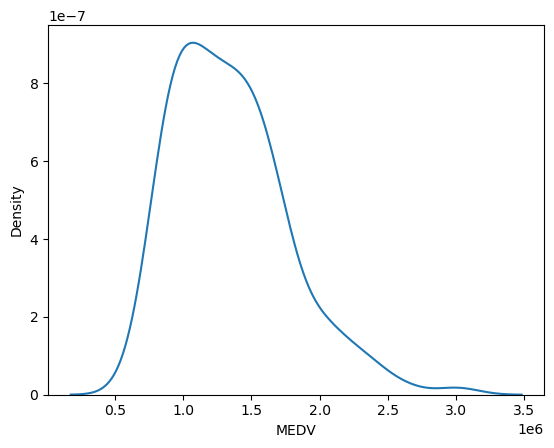

In [221]:
sns.distplot(residuals, hist = False) 

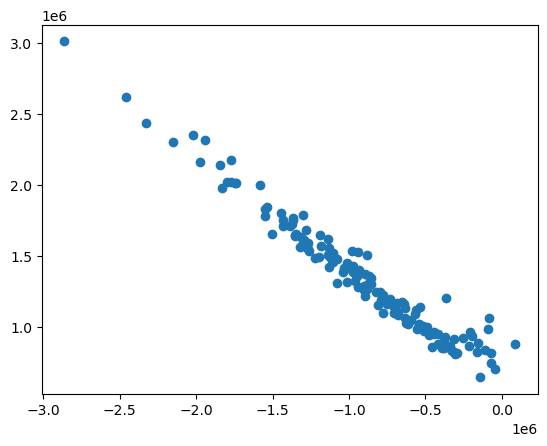

In [223]:
plt.scatter(reg_predict, residuals)

Metrics

In [226]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [228]:
mean_squared_error(y_test, reg_predict)


1997102851903.4465

In [230]:
mean_absolute_error(y_test, reg_predict)


1348400.6978453847

In [232]:
np.sqrt(mean_squared_error(y_test, reg_predict))

1413188.894629252

R square and Adjusted R square

In [235]:
from sklearn.metrics import r2_score

In [237]:
score = r2_score(y_test, reg_predict)
positive_score = abs(score)

positive_score

86.55321540504085

In [274]:
new_data = np.array("df")

reshaped_array = new_data.reshape(1, -1)

pickling the model(Deployment)

In [277]:
import pickle

In [279]:
pickle.dump(regression,open("regmodel.pkl","wb"))

In [281]:
pickled_model = pickle.load(open("regmodel.pkl",'rb'))